An overview of using CLASSIFICATION algorithms to build a prediction model.

Including how to score the model.

This example will use the MNIST data set, a set of 70000 images of digits handwriteen by school kids.

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

Datasets loaded from SkLearn, generally have a similar dictionary structure:
- A DESCR key describing the dataset
- A data key containing an array with one row per instance and one column per feature
- A target key containing an array of labels

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

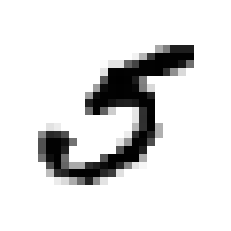

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

example = X[36000]
example_image = example.reshape(28, 28)

plt.imshow(example_image, cmap = matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off");

In [4]:
y[36000]

5.0

The MNIST dataset is already split into a training set (first 60000) and a test set (last 10000)

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

As discussed in the EndToEndProjectWalkthrough, should shuffle the training set so that the cross-validation fold are similar (i.e. folds do not have missing digits - stratified sampling).

In [6]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

#### Training a Binary Classifier

First it is logical to simplify the problem to one digit, e.g. 5. A binary classifier is capable of distinguishing between two classes, 5 and not 5. 

Target vector:

In [7]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Next, chooe a classifier and trian.

Firstly: Stochastic Gradient Descent (SGD) classifier.

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

Can now use to predict the label of digits!

In [9]:
sgd_clf.predict([example])

array([ True])

#### Performance Measures

A good way to evaluate a model is to use cross-validation.

Sometimes you need more control over the process than just the cross_val_score and similar functions provide. 

Can implement the code ourselves:

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))   
    

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9637


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.90785


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9286


Alternatively can just use the cross_val_score..

In [11]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

array([0.9637 , 0.90785, 0.9286 ])

Can see an above 95% accuracy on all CV folds...that's amazing right?....

Lets take a look at a simple classifier that just classifies every single image in the 'not-5' class:

In [12]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.91185, 0.90915, 0.90795])

This extremely basic classifier also has over 90% accuracy...

This is simply because only about 10% of the images are 5, so if you guess that an image is not a 5, you will be right about 90% of the time.

This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when dealing with skewed datasets (i.e. more classes are more frequent than the other). 

### Confusion Matrix

The confusion matrix is a much better way of evaluating a classifier's performance. It computes the number of times class A and class B are predicted correctly, but also the number of time class A is predicted as class B. For this example, if you wanted to know the number of times the classifer classified a 5 as a 3, you would look to the 5th row and 3rd column of the confusion matrix.

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

confusion_matrix(y_train_5, y_train_pred)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

array([[51249,  3330],
       [  667,  4754]])

So here 53589 were predicted correct to not be 5 and 4283 were predicted correctly to be 5. So True Negatives (TN) and True Positives (TP)

1138 were falsely identified as 5, so False Negatives (FN). 990 were falsely identified as not 5 so False Positives (FP)

We calcualted the accuracy before which is simply:

$$accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

We can also look at the precision, so how many of all identified positives are correctly identified:

$$precision = \frac{TP}{TP + FP}$$

However there is a trivial way to get perfect precision and that is to make one single positive prediction and ensure it is correct (1/1 = 100%). So to compliment the precision we can calculate the recall. This is the 'sensitivity' or 'True Positive Rate (TPR)'. This is the ration of positive instances that are correctly identified by the classifier:

$$recall = \frac{TP}{TP + FN}$$

In [14]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred)

(0.5880752102919347, 0.8769599704851503)

Now we can see that the classifier is not as good as once thought. 

You can combine the precision and recall into one metric called the F1 score, which is the harmonic mean of the two values. Harmonic means simply give more weight to low values, as a result the F1 score will only be high if both precision and recall are high.

$$ F1 = \frac{2}{(\frac{1}{precision})+(\frac{1}{recall})} = \frac{TP}{TP + (\frac{FN + FP}{2})}$$

In [15]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7040355423917066

F1 scores favour classifiers that have similar precision and recall. This is not always what you want, sometimes you may want a high precision and sometimes a high recall. It is dependent on the problem you are modelling.

Unfortunately you can't have it both ways, increasing precision reduces recall and vice versa. This is called the precision/recall tradeoff.

#### Precision/Recall Tradeoff

A SGD classifier makes a decision on each instance by using a computed score based on a decision function. If the score is greater than a threshold, it assigns the instance to a positive class or else it assigns it to the negative class. 

We cannot set the threshold dirctly in sklearn, but we do have access to the decision scores used to make the prediction:

In [16]:
y_scores = sgd_clf.decision_function([example])
y_scores

array([222828.98088844])

The SGD classifier uses a threshold equal to 0.

If we were to raise the threshold to over 1290, we would decrease the recall (TP / TP + FN). So how do you decide on which threshold to use...

Need to get the scores of all instances in the training set adn then compute the precision and recall for all possible thresholds:

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

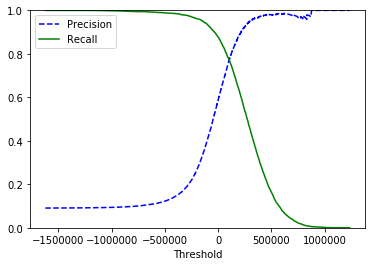

In [17]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

Now can select the threshold value that gives you the best precision/recall tradeoff.

Another way to select a good precision/recall tradeoff is to plot precision directly against recall.

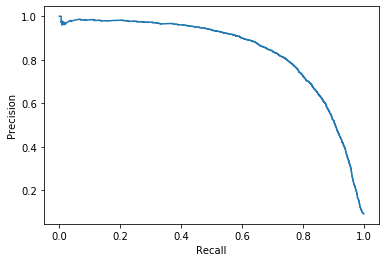

In [18]:
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision");

We can see that precision sharply starts to fall at arount 80% recall.

#### ROC Curve

Reciever Operating Characteristic (ROC) curve is another commono tool used with binary classifiers.

Very similar to precision/recall plot, but instead the ROC curve plots the true positive rate (recall) against the false positive rate (FPR). The FPR is the ration of negative instances that were incorrectly identified as positive. It is equal to 1- true negative rate, which is the specificity. Hence the ROC curve plits sensitivity (recall) versus 1 - specificity:

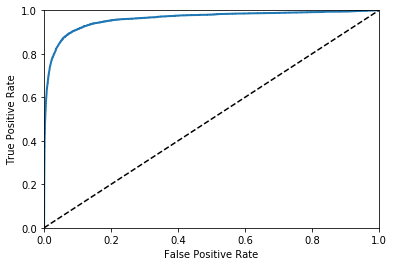

In [19]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr);

Can see another tradeoff happening, the higher the recall (TPR) the more false positives the classifier produces. The dotted line represents the ROC curve of a purely random classifier. A good classifer stays as far away as possible from that line (towards top left corner, maxismises its area betwene the line and itself).

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have an ROC AUC equal to 0.5:

In [20]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9612790510396396

Can train a new classifier (Random Forest) and compare its ROC and ROC AUC score agains the SGD classifier.

In [21]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

To plot ROC curve, need scores not probabilities. A simple solution is to the positive class's probability as the score:

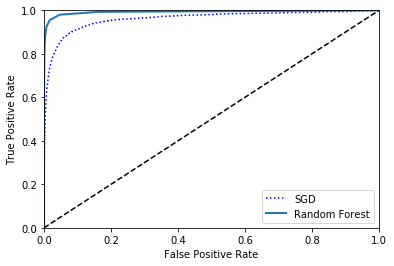

In [22]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest =  roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right");

In [23]:
roc_auc_score(y_train_5, y_scores_forest)

0.9929160071813168

Can see that the random forest classifier performs better than the SGD!

## Multiclass Classification

In some cases you want your classifier to ouput mutiple classes for each instance, i.e multibalel classfier.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel= np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

This code creates a y_multilabel array containing two target labels for each digit: the first indicates whether or not the digit is large (7, 8 or 9) and the second indicates whether it is odd.

In [26]:
knn_clf.predict([example])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

This average="macro" but makes the score assume all labels are equally important, which may not always be the case. If you have more instances of one label than another, you may want to weight the classifiers score on that label with more instances. One simple option is to give each label a weight equal to its suppport.

To do this, simply set average="weighted"